# **Supervised Learning Problem : EDA of Ovarian Cancer dataset**
##### **Introduction:**
*The main aim of this project is to utilise various machine learning methods to develop a model to detect ovarian cancer. The notebook is structured as below.*

- **Data Wrangling:** 
    *This section focuses on preprocessing the raw data to create a clean dataset suitable for training the machine learning model. Includes Imputation, Standardization and Preliminary Data Analysis.*
- **Feature Engineering:** 
    *This section extracts relevant features from the data to improve the accuracy of the model.*
- **Model Training:** 
    *This section trains the machine learning model using several classification methods and ensemble learning algorithms to evaluates their performance using various metrics.*


In [1]:
#Initialize the libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [2]:
#Reading data from the excel file and Summarizing

#TARGET COLUMN = TYPE (1 - BOT --- Benign Ovarian Tumor and 0 - OC --- Ovarian Cancer)

pd.set_option('display.width', 150)
df = pd.read_excel("C:\SupplementaryData1.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SUBJECT_ID  349 non-null    int64  
 1   AFP         327 non-null    object 
 2   AG          348 non-null    float64
 3   Age         349 non-null    int64  
 4   ALB         339 non-null    float64
 5   ALP         339 non-null    float64
 6   ALT         339 non-null    float64
 7   AST         339 non-null    float64
 8   BASO#       349 non-null    float64
 9   BASO%       349 non-null    float64
 10  BUN         349 non-null    float64
 11  Ca          349 non-null    float64
 12  CA125       332 non-null    object 
 13  CA19-9      325 non-null    object 
 14  CA72-4      109 non-null    float64
 15  CEA         327 non-null    float64
 16  CL          349 non-null    float64
 17  CO2CP       348 non-null    float64
 18  CREA        349 non-null    float64
 19  TYPE        349 non-null    i

In [3]:
#Printing the first 5 rows of the data
df.head()

,SUBJECT_ID,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,...,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA
0,1,3.58\t,19.36,47,45.4,56.0,11.0,24.0,0.01,0.30,...,76.2,0.09,13.4,1.46,74,2.64,13.7,5.5,73.9,396.4
1,2,34.24\t,23.98,61,39.9,95.0,9.0,13.0,0.02,0.30,...,76.5,0.30,11.2,1.09,304,4.89,12.7,6.8,72.0,119.2
2,3,1.50\t,18.40,39,45.4,77.0,9.0,18.0,0.03,0.60,...,69.7,0.13,15.2,0.97,112,4.62,12.0,14.8,77.9,209.2
3,4,2.75,16.60,45,39.2,26.0,16.0,17.0,0.05,0.74,...,65.5,0.25,17.4,1.25,339,4.01,14.6,10.9,66.1,215.6
4,5,2.36,19.97,45,35.0,47.0,21.0,27.0,0.01,0.10,...,59.5,0.28,11.9,0.94,272,4.40,13.4,5.3,66.5,206.0


In [4]:
#Summerizing the data : Nan values are excluded
df.describe()

,SUBJECT_ID,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,...,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA
count,349.000000,348.000000,349.000000,339.000000,339.000000,339.000000,339.000000,349.000000,349.000000,349.000000,...,258.000000,347.000000,347.000000,349.000000,349.000000,349.000000,349.000000,339.000000,339.000000,349.000000
mean,196.232092,19.320517,45.051576,41.076991,77.085546,18.011799,19.106195,0.028883,0.479771,4.011117,...,66.575543,0.251458,14.330490,1.120602,255.432665,4.359513,13.549914,9.089676,71.078761,243.706590
std,126.944872,4.348675,15.130949,5.686780,44.375700,11.243664,8.495069,0.020890,0.346230,1.285569,...,11.612845,0.085308,3.000556,0.187649,95.241974,0.465894,1.802818,4.164891,7.365056,68.581936
min,1.000000,6.200000,15.000000,22.000000,26.000000,4.000000,7.000000,0.000000,0.000000,1.120000,...,37.200000,0.070000,8.800000,0.570000,74.000000,2.620000,10.920000,2.500000,32.900000,96.000000
25%,88.000000,17.287500,33.000000,38.300000,60.000000,11.000000,13.500000,0.010000,0.200000,3.160000,...,58.755000,0.192000,11.900000,1.000000,202.000000,4.110000,12.400000,6.200000,67.450000,200.100000
50%,175.000000,19.850000,45.000000,42.000000,71.000000,15.000000,17.000000,0.030000,0.400000,3.830000,...,66.750000,0.240000,13.700000,1.120000,236.000000,4.370000,13.100000,8.400000,72.500000,235.400000
75%,327.000000,22.177500,57.000000,45.300000,87.000000,21.000000,22.000000,0.040000,0.700000,4.780000,...,74.975000,0.300000,16.850000,1.240000,292.000000,4.660000,14.400000,10.750000,75.950000,276.600000
max,414.000000,33.330000,83.000000,51.500000,763.000000,86.000000,78.000000,0.120000,1.940000,10.190000,...,92.000000,0.690000,22.800000,1.750000,868.000000,6.740000,22.200000,38.300000,86.800000,632.000000


# DATA WRANGLING

In [5]:
#There are three colomns in the dataset that need to be converted to float64 namely 'AFP','CA125' and 'CA19-9' before standardizing them.
#But there are some instances with string values such as '<0.60', '>1000', null values and tab spaces that needs to be handled first.

df['CA19-9']=df['CA19-9'].str.replace("<","")
df['CA19-9'] = df['CA19-9'].apply(lambda x: str(x))
df['CA19-9'] = df['CA19-9'].replace(r'[>\t]','',regex=True)
df['CA19-9'] = df['CA19-9'].astype('float64')
print(df['CA19-9'].unique())


[3.648e+01 1.998e+01 1.218e+01       nan 1.970e+00 1.879e+01 7.908e+01
 5.661e+02 2.093e+01 5.492e+01 6.000e-01 5.410e+00 6.405e+01 2.584e+01
 1.029e+01 1.004e+02 1.250e+00 1.552e+01 1.917e+02 4.658e+02 5.760e+00
 1.706e+02 1.000e+03 1.570e+00 6.990e+00 8.800e-01 8.509e+01 5.217e+01
 1.960e+00 2.375e+01 8.500e+00 2.923e+01 1.157e+01 9.570e+00 2.460e+00
 1.122e+01 3.019e+01 7.040e+00 9.530e+00 6.000e+00 4.739e+01 6.629e+01
 1.410e+01 6.189e+01 4.120e+01 5.110e+00 5.550e+00 1.420e+01 9.850e+00
 3.636e+01 9.410e+00 6.970e+00 6.166e+01 6.920e+00 8.240e+00 1.742e+02
 4.424e+01 9.390e+00 1.716e+02 4.090e+00 6.820e+00 3.183e+01 6.440e+01
 4.348e+01 6.480e+00 1.266e+01 4.830e+00 3.337e+01 1.782e+01 9.910e+00
 1.273e+01 2.693e+02 2.110e+01 3.714e+01 2.536e+01 7.600e-01 6.360e+00
 8.760e+00 7.700e-01 1.043e+02 1.244e+01 2.585e+01 8.770e+00 6.248e+01
 4.896e+01 6.330e+00 2.449e+01 1.690e+02 1.279e+01 1.473e+02 3.094e+01
 2.311e+01 2.269e+01 1.040e+01 3.882e+01 1.214e+01 1.610e+00 3.402e+01
 1.108

In [6]:
print(df['AFP'].unique())

['3.58\t' '34.24\t' '1.50\t' 2.75 2.36 3.79 nan '3.03\t' '1.01\t' 4.7
 '1.93\t' '4.00\t' 2.13 4.34 '2.54\t' 2.15 '4.64\t' 1.17 17.52 '2.70\t'
 '1.60\t' 1.54 1.75 '3.18\t' '1.70\t' 1.38 1.6 '1.42\t' '2.88\t' '2.00\t'
 2.7 7.07 '2.02\t' 2.85 '8.06\t' '3.46\t' 2.49 '2.75\t' 0.71 '0.77\t'
 '2.16\t' 3.01 1.74 4.25 2.58 '2.20\t' 2.8 2.76 2.03 '5.70\t' '1.92\t'
 '2.60\t' '2.98\t' 1.78 2.25 '4.87\t' 2.22 '4.50\t' '3.28\t' '2.44\t'
 '2.30\t' '1.80\t' 1.77 2.43 '3.69\t' 2.31 '>1210.00' '1.76\t' 3.41 1.2
 2.19 0.95 1.49 '2.73\t' '1.86\t' 508 7.87 1.67 '1.68\t' '2.42\t' '2.71\t'
 '1.51\t' '13.02\t' '1.53\t' '0.70\t' '2.94\t' 3.77 '3.20\t' '1.96\t' 3.12
 '1.74\t' 1.63 '1.85\t' 2.08 3.27 '4.16\t' '1.83\t' '1.22\t' 3.73 4.4
 '1.49\t' '3.86\t' '4.03\t' '2.64\t' 2.57 0.61 '2.99\t' 2.1 4.1 '4.28\t'
 1.21 '1.69\t' 2.33 '1.89\t' 3.76 4 2.98 2.65 '1.32\t' '1.88\t' 2.78 1.14
 1.73 1.72 1.36 2.66 3.24 3.67 2.91 1.89 1.66 0.81 1.57 0.9 2.28 4.09 0.88
 1.42 2.2 2.41 0.84 1.4 1.85 1.12 2.11 3.5 0.73 2.95 5.67 1

In [7]:
df['AFP'] = df['AFP'].apply(lambda x: str(x))

df['AFP'] = df['AFP'].replace(r'[>\t]','',regex=True)

df['AFP'] = df['AFP'].astype('float64')
print(df['AFP'].unique())

[3.580e+00 3.424e+01 1.500e+00 2.750e+00 2.360e+00 3.790e+00       nan
 3.030e+00 1.010e+00 4.700e+00 1.930e+00 4.000e+00 2.130e+00 4.340e+00
 2.540e+00 2.150e+00 4.640e+00 1.170e+00 1.752e+01 2.700e+00 1.600e+00
 1.540e+00 1.750e+00 3.180e+00 1.700e+00 1.380e+00 1.420e+00 2.880e+00
 2.000e+00 7.070e+00 2.020e+00 2.850e+00 8.060e+00 3.460e+00 2.490e+00
 7.100e-01 7.700e-01 2.160e+00 3.010e+00 1.740e+00 4.250e+00 2.580e+00
 2.200e+00 2.800e+00 2.760e+00 2.030e+00 5.700e+00 1.920e+00 2.600e+00
 2.980e+00 1.780e+00 2.250e+00 4.870e+00 2.220e+00 4.500e+00 3.280e+00
 2.440e+00 2.300e+00 1.800e+00 1.770e+00 2.430e+00 3.690e+00 2.310e+00
 1.210e+03 1.760e+00 3.410e+00 1.200e+00 2.190e+00 9.500e-01 1.490e+00
 2.730e+00 1.860e+00 5.080e+02 7.870e+00 1.670e+00 1.680e+00 2.420e+00
 2.710e+00 1.510e+00 1.302e+01 1.530e+00 7.000e-01 2.940e+00 3.770e+00
 3.200e+00 1.960e+00 3.120e+00 1.630e+00 1.850e+00 2.080e+00 3.270e+00
 4.160e+00 1.830e+00 1.220e+00 3.730e+00 4.400e+00 3.860e+00 4.030e+00
 2.640

In [8]:
df['CA125'].unique()

array(['15.36\t', '2444.00\t', '56.08\t', 2555, 1391, 55.97, nan,
       '39.83\t', '48.14\t', 21.46, '16.65\t', '3271.00\t', 123.1, 3499,
       '4468.00\t', 359.7, '259.30\t', 202.1, '450.00\t', 57.94, 18.16,
       '27.80\t', '71.80\t', 34.01, 38.59, '121.10\t', '389.30\t', 21.29,
       279.8, '196.90\t', '446.20\t', '237.40\t', 51.35, 473.3,
       '1280.00\t', 2252, '516.50\t', '386.70\t', 24.51, '396.80\t',
       675.7, '22.84\t', '106.30\t', 4159, 270.6, '2193.00\t', 865.7,
       107.6, '48.84\t', 42.66, 3967, 64.88, '476.00\t', '886.50\t',
       '21.95\t', '14.81\t', 67.14, 2233, '675.70\t', 38.82, '42.63\t',
       '2741.00\t', '7.33\t', '224.20\t', '377.10\t', '1777.00\t', 73.11,
       1214, '77.32\t', '275.70\t', 165.8, '124.30\t', 738.4, '3950.00\t',
       23.96, 11.83, 14.88, 461.2, 328, '255.50\t', '>5000.00\t', 124.6,
       1466, 31.99, '294.80\t', '169.80\t', '228.90\t', '740.20\t',
       '913.90\t', '21.24\t', '428.00\t', '1717.00\t', '554.80\t', 2489,
       '

In [9]:
df['CA125'] = df['CA125'].apply(lambda x: str(x))
df['CA125'] = df['CA125'].replace(r'[>\t]','',regex=True)
df['CA125'] = df['CA125'].astype('float64')
df['CA125'].unique()

array([1.536e+01, 2.444e+03, 5.608e+01, 2.555e+03, 1.391e+03, 5.597e+01,
             nan, 3.983e+01, 4.814e+01, 2.146e+01, 1.665e+01, 3.271e+03,
       1.231e+02, 3.499e+03, 4.468e+03, 3.597e+02, 2.593e+02, 2.021e+02,
       4.500e+02, 5.794e+01, 1.816e+01, 2.780e+01, 7.180e+01, 3.401e+01,
       3.859e+01, 1.211e+02, 3.893e+02, 2.129e+01, 2.798e+02, 1.969e+02,
       4.462e+02, 2.374e+02, 5.135e+01, 4.733e+02, 1.280e+03, 2.252e+03,
       5.165e+02, 3.867e+02, 2.451e+01, 3.968e+02, 6.757e+02, 2.284e+01,
       1.063e+02, 4.159e+03, 2.706e+02, 2.193e+03, 8.657e+02, 1.076e+02,
       4.884e+01, 4.266e+01, 3.967e+03, 6.488e+01, 4.760e+02, 8.865e+02,
       2.195e+01, 1.481e+01, 6.714e+01, 2.233e+03, 3.882e+01, 4.263e+01,
       2.741e+03, 7.330e+00, 2.242e+02, 3.771e+02, 1.777e+03, 7.311e+01,
       1.214e+03, 7.732e+01, 2.757e+02, 1.658e+02, 1.243e+02, 7.384e+02,
       3.950e+03, 2.396e+01, 1.183e+01, 1.488e+01, 4.612e+02, 3.280e+02,
       2.555e+02, 5.000e+03, 1.246e+02, 1.466e+03, 

In [10]:
#Checking for null values

df.isna().columns

Index(['SUBJECT_ID', 'AFP', 'AG', 'Age', 'ALB', 'ALP', 'ALT', 'AST', 'BASO#', 'BASO%', 'BUN', 'Ca', 'CA125', 'CA19-9', 'CA72-4', 'CEA', 'CL',
       'CO2CP', 'CREA', 'TYPE', 'DBIL', 'EO#', 'EO%', 'GGT', 'GLO', 'GLU.', 'HCT', 'HE4', 'HGB', 'IBIL', 'K', 'LYM#', 'LYM%', 'MCH', 'MCV',
       'Menopause', 'Mg', 'MONO#', 'MONO%', 'MPV', 'Na', 'NEU', 'PCT', 'PDW', 'PHOS', 'PLT', 'RBC', 'RDW', 'TBIL', 'TP', 'UA'],
      dtype='object')

In [11]:
df.isna().sum()

SUBJECT_ID      0
AFP            22
AG              1
Age             0
ALB            10
ALP            10
ALT            10
AST            10
BASO#           0
BASO%           0
BUN             0
Ca              0
CA125          17
CA19-9        168
CA72-4        240
CEA            22
CL              0
CO2CP           1
CREA            0
TYPE            0
DBIL           10
EO#             0
EO%             0
GGT            10
GLO            10
GLU.            0
HCT             0
HE4            20
HGB             0
IBIL           10
K               0
LYM#            0
LYM%            0
MCH             0
MCV             0
Menopause       0
Mg              0
MONO#           0
MONO%           0
MPV             2
Na              0
NEU            91
PCT             2
PDW             2
PHOS            0
PLT             0
RBC             0
RDW             0
TBIL           10
TP             10
UA              0
dtype: int64

In [12]:
#Dropping CA72-4 (Carbohydrate antigen 72-4) as it has 240 missing values out of 349 values and SUBJECT_ID

df.drop(['CA72-4','SUBJECT_ID'],inplace=True,axis=1)


In [13]:
df.info()
#(total 49 columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 49 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AFP        327 non-null    float64
 1   AG         348 non-null    float64
 2   Age        349 non-null    int64  
 3   ALB        339 non-null    float64
 4   ALP        339 non-null    float64
 5   ALT        339 non-null    float64
 6   AST        339 non-null    float64
 7   BASO#      349 non-null    float64
 8   BASO%      349 non-null    float64
 9   BUN        349 non-null    float64
 10  Ca         349 non-null    float64
 11  CA125      332 non-null    float64
 12  CA19-9     181 non-null    float64
 13  CEA        327 non-null    float64
 14  CL         349 non-null    float64
 15  CO2CP      348 non-null    float64
 16  CREA       349 non-null    float64
 17  TYPE       349 non-null    int64  
 18  DBIL       339 non-null    float64
 19  EO#        349 non-null    float64
 20  EO%       

In [14]:
#Have a copy of orignal data before imputing
df_with_missdata = df
df_with_missdata.shape

(349, 49)

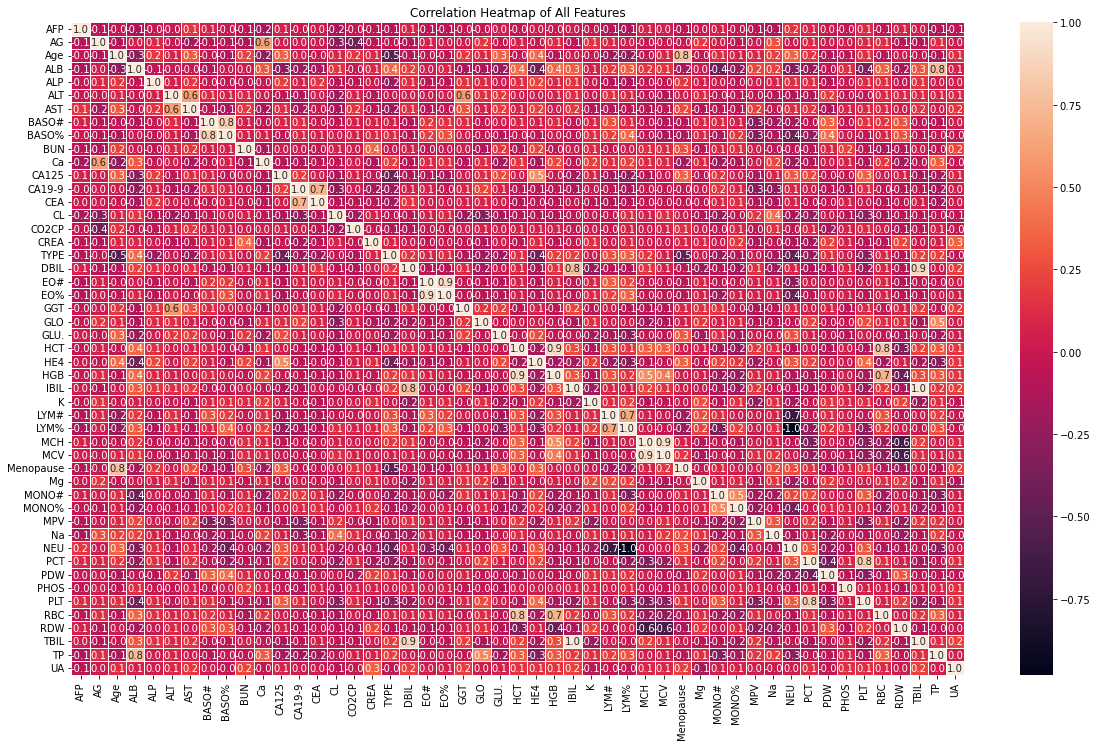

In [15]:
#Before imputing let's see how the features are correlated to each other to visually get an idea of which features are important and which are not. We will use the correlation matrix and the heatmap to visualize
#the correlation between the features. The correlation matrix is a matrix that shows the correlation between all the possible pairs of values in a table. The heatmap is a graphical representation of the correlation 
#matrix using colors to visualize the correlation between the features. The darker the color the higher the correlation between the features. 
#The lighter the color the lower the correlation between the features. The diagonal of the correlation matrix is always 1 because it shows the correlation between a feature and itself.

import seaborn as sns
# Create a correlation matrix
corr_matrix = np.around( df.corr(),2)

# Plot the heatmap using seaborn
plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix,linewidths=1, fmt= '.1f', annot=True)
plt.title('Correlation Heatmap of All Features')
plt.show()

## IMPUTATION, STANDARDIZATION and FEATURE SELECTION 

- MinMaxScalar() : The MinMaxScaler is a preprocessing technique used to scale the data within a given range, usually between 0 and 1. It transforms the data by scaling each feature individually such that it is in the given range on the training set. This transformation is often used as an alternative to zero mean, unit variance scaling.

- IterativeImputer() : The IterativeImputer class in scikit-learn is a multivariate imputer that estimates missing values in a dataset by modeling each feature with missing values as a function of other features. It uses a round-robin regression method, where each feature is imputed sequentially, using the other features as predictors. This approach can be more sophisticated than univariate imputation methods, which only use information from the same feature to impute missing values.

- SelectKBest() : SelectKBest is a feature selection class in scikit-learn that selects the top k features based on their scores. It works by scoring each feature using a user-specified scoring function, and then retaining only the k highest-scoring features. This method can be used for both classification and regression tasks by changing the score_func parameter.

In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import set_config

#setting the config to pandas to make it easier to read the data frame in the notebook 
set_config(transform_output='pandas')

#Seperate features and target variables
X = df.drop(['TYPE'],axis=1)
y = df['TYPE']


#Split data into training and testing sets

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

#Impute missing values using IterativeImputer
#using a pipeline to scale, impute, and select features
clf=make_pipeline(MinMaxScaler(),IterativeImputer(missing_values=np.nan, random_state=0,max_iter=100),SelectKBest(f_classif,k=20))

#Fit and transform training data
clf.fit(X_train,y_train)

X_transformed=clf.transform(X_train)


In [17]:
X_transformed.info()

#Now the dataset has 20 columns as expected

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 166 to 172
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        244 non-null    float64
 1   ALB        244 non-null    float64
 2   ALP        244 non-null    float64
 3   AST        244 non-null    float64
 4   Ca         244 non-null    float64
 5   CA125      244 non-null    float64
 6   GGT        244 non-null    float64
 7   GLO        244 non-null    float64
 8   GLU.       244 non-null    float64
 9   HE4        244 non-null    float64
 10  HGB        244 non-null    float64
 11  IBIL       244 non-null    float64
 12  LYM#       244 non-null    float64
 13  LYM%       244 non-null    float64
 14  Menopause  244 non-null    float64
 15  MONO#      244 non-null    float64
 16  NEU        244 non-null    float64
 17  PCT        244 non-null    float64
 18  PLT        244 non-null    float64
 19  TBIL       244 non-null    float64
dtypes: float

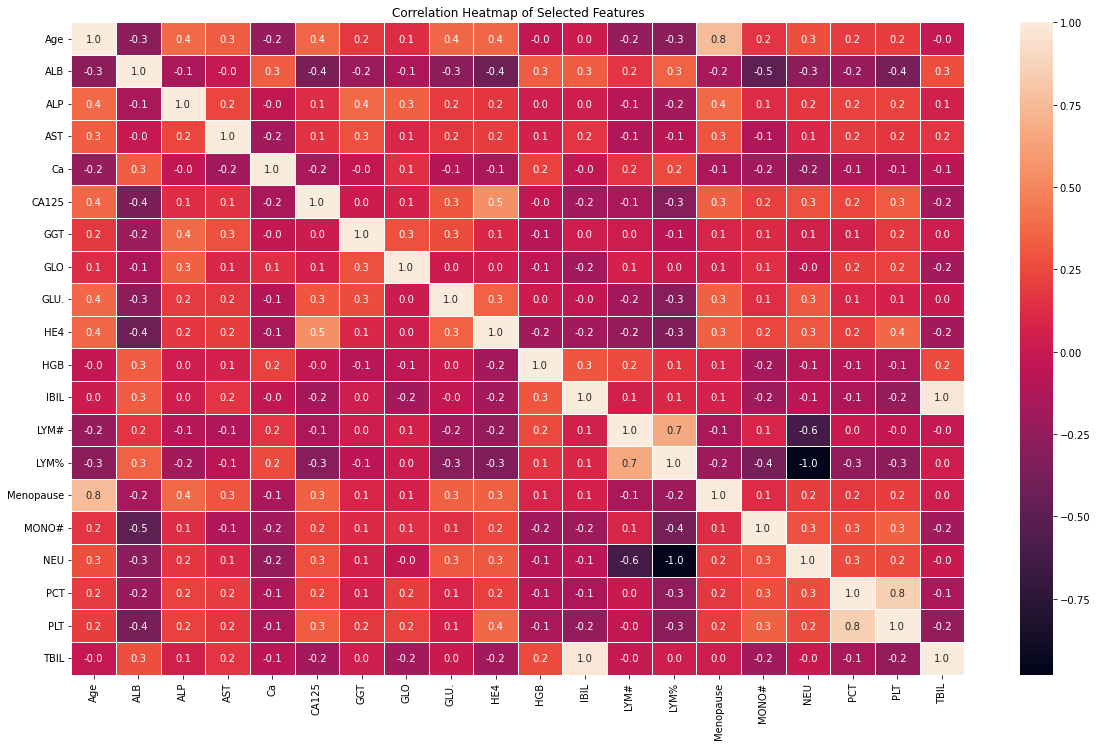

In [18]:
#After few data preprocessing steps, let's see how the features are correlated

import seaborn as sns
# Create a correlation matrix
corr_matrix = np.around( X_transformed.corr(),2)

# Plot the heatmap using seaborn
plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix,linewidths=1, fmt= '.1f', annot=True)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

Pearson correlation coefficient and p-value for LYM% and LYM# is (0.6604235049853333, 5.98998136609527e-32)
Pearson correlation coefficient and p-value for PLT and PCT is (0.8477260427740514, 1.3851059662544984e-68)
Pearsonr correlation coefficient and p-value for NEU and LYM% is (-0.9813654612311099, 2.2853688660303903e-175)


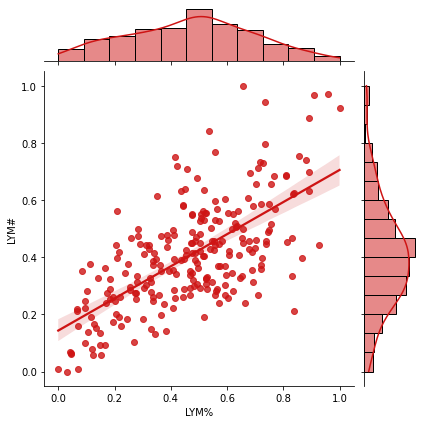

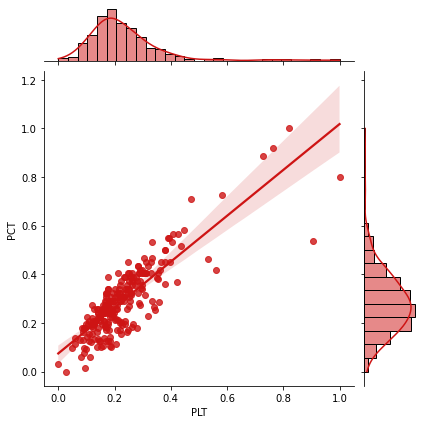

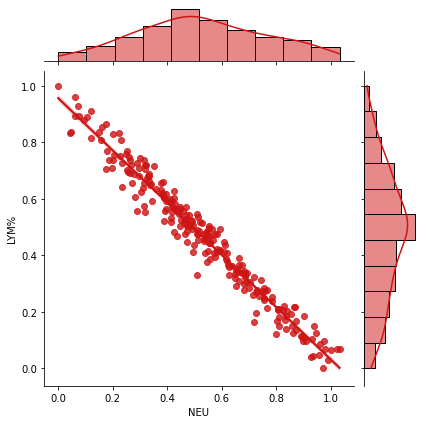

In [19]:
# After careful analysis of the above heatmap, we can see that the following features are highly correlated with each other:

# 1. 'LYM%' and 'LYM#' (correlation coefficient = 0.7)
# 2. 'PLT' and 'PCT' (correlation coefficient = 0.8)
# 3. 'NEU' and 'LYM%' (correlation coefficient = -1)

from scipy.stats.stats import pearsonr

# Plotting the correlation between the features
sns.jointplot(x=X_transformed.loc[:,'LYM%'],y= X_transformed.loc[:,'LYM#'], kind="reg", color="#ce1414")
print("Pearson correlation coefficient and p-value for LYM% and LYM# is",pearsonr(X_transformed.loc[:,'LYM%'], X_transformed.loc[:,'LYM#']))

sns.jointplot(x=X_transformed.loc[:,'PLT'], y=X_transformed.loc[:,'PCT'], kind="reg", color="#ce1414")
print("Pearson correlation coefficient and p-value for PLT and PCT is",pearsonr(X_transformed.loc[:,'PLT'], X_transformed.loc[:,'PCT']))

sns.jointplot(x=X_transformed.loc[:,'NEU'], y=X_transformed.loc[:,'LYM%'], kind="reg", color="#ce1414")
print("Pearsonr correlation coefficient and p-value for NEU and LYM% is",pearsonr(X_transformed.loc[:,'NEU'], X_transformed.loc[:,'LYM%']))



In [20]:
# Since the above features are highly correlated, we will use LYM% and PLT and drop PCT and NEU
X_transformed_new = X_transformed.drop(['PCT', 'NEU','LYM#'], axis=1)
X_transformed_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 166 to 172
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        244 non-null    float64
 1   ALB        244 non-null    float64
 2   ALP        244 non-null    float64
 3   AST        244 non-null    float64
 4   Ca         244 non-null    float64
 5   CA125      244 non-null    float64
 6   GGT        244 non-null    float64
 7   GLO        244 non-null    float64
 8   GLU.       244 non-null    float64
 9   HE4        244 non-null    float64
 10  HGB        244 non-null    float64
 11  IBIL       244 non-null    float64
 12  LYM%       244 non-null    float64
 13  Menopause  244 non-null    float64
 14  MONO#      244 non-null    float64
 15  PLT        244 non-null    float64
 16  TBIL       244 non-null    float64
dtypes: float64(17)
memory usage: 34.3 KB


In [21]:
#Dropping highly correlated features in the test set
X_test = clf.transform(X_test)
X_test_2 = X_test.drop(['PCT', 'NEU','LYM#'], axis=1)

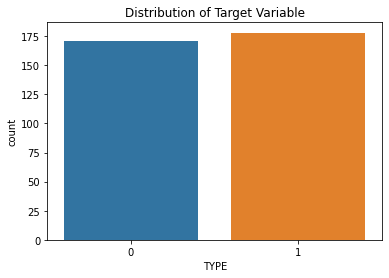

In [22]:
# Visualizing the distribution of the target variable in the training data to get a sense of how balanced the problem is.
#TARGET COLUMN = TYPE (1 - BOT --- Benign Ovarian Tumor and 0 - OC --- Ovarian Cancer)

sns.countplot(x=y, data=df)
plt.title('Distribution of Target Variable')
plt.show()

# **MODEL TRAINING**


Logistic Regression



Logistic Regression Accuracy:  0.819047619047619
Training Score: 0.8319672131147541
Logistic regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        57
           1       0.78      0.83      0.81        48

    accuracy                           0.82       105
   macro avg       0.82      0.82      0.82       105
weighted avg       0.82      0.82      0.82       105



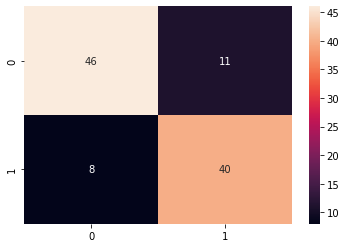

In [23]:
#Starting with a simple logistic regression model
from sklearn.metrics import classification_report

clf_logreg = LogisticRegression(random_state=0, solver='saga',l1_ratio=0.5,penalty='elasticnet').fit(X_transformed_new, y_train)
yhat = clf_logreg.predict(X_test_2)
print("Logistic Regression Accuracy: ",accuracy_score(y_test, yhat))
print("Training Score:", clf_logreg.score(X_transformed_new, y_train))
LR_acc = accuracy_score(y_test, yhat)
#confusion matrix
cm = confusion_matrix(y_test, yhat)
sns.heatmap(cm,annot=True,fmt="d")

# evaluate the model on the test set
print("Logistic regression Classification Report:")
print(classification_report(y_test, yhat))

Support Vector Machine

SVC Accuracy:  0.8
Training Score: 0.8401639344262295
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        57
           1       0.76      0.81      0.79        48

    accuracy                           0.80       105
   macro avg       0.80      0.80      0.80       105
weighted avg       0.80      0.80      0.80       105



<AxesSubplot:>

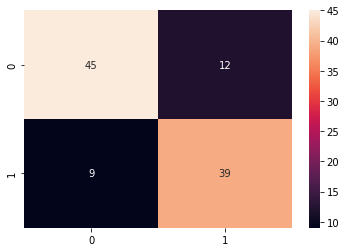

In [24]:
#Trying to use SVC to see if it performs better than the logistic regression model

from sklearn.svm import SVC

# Training the SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=1)
svm_model.fit(X_transformed_new, y_train)

# Predicting the target values for test data
test_preds = svm_model.predict(X_test_2)

SVC_acc = svm_model.score(X_test_2, y_test)
print("SVC Accuracy: ", SVC_acc)
print("Training Score:", svm_model.score(X_transformed_new, y_train))
# evaluate the model on the test set
print("SVM Classification Report:")
print(classification_report(y_test, test_preds))

#confusion matrix
cm_svc = confusion_matrix(y_test, test_preds)
sns.heatmap(cm_svc,annot=True,fmt="d")


##### Both SVM and Logistic regression performed well by not overfitting the data as seen by their Training and Testing scores. Let's see if adopting more complex model gives us a better performance in terms of accuracy.


## Complex Models:

Random Forest Classifier

Random Forest Classifier Accuracy: 0.8095238095238095
Training Score: 0.9590163934426229


<AxesSubplot:>

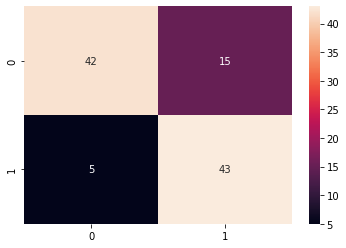

In [25]:
clf_rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0).fit(X_transformed_new, y_train)
y_pred_rfc = clf_rfc.predict(X_test_2)

print("Random Forest Classifier Accuracy:",accuracy_score(y_test, y_pred_rfc))
print("Training Score:", clf_rfc.score(X_transformed_new, y_train))
RF_acc = accuracy_score(y_test, y_pred_rfc)
#Confusion Matrix
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm_rfc, annot=True, fmt="d")

We can see by comparing Training and Test scores of RF Classifier, there is a bit of underfitting. Next approach is to tune the hyperparameters of the Random Forest Classifier for better accuracy.

### GridSearchCV with Random Forest Classifier as estimator

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

scoring = {"AUC": "roc_auc", "Accuracy": 'accuracy', "F1": 'f1', "Precision": 'precision', "Recall": 'recall'}
param_grid = {
    'n_estimators': [300, 400, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    }
gs_rfc = GridSearchCV( 
    RandomForestClassifier(random_state=43, n_jobs=-1, class_weight='balanced', max_features='sqrt', criterion='gini', bootstrap=True, oob_score=True, ),
    param_grid=param_grid,
    refit="Accuracy",
    scoring=scoring,
    n_jobs=-1,)
gs_rfc.fit(X_transformed_new, y_train)

results = gs_rfc.cv_results_
print(f'The best parameter is : {gs_rfc.best_params_}')
print(f'The best score is {gs_rfc.best_score_}')
print(f'The best estimator is {gs_rfc.best_estimator_}')



The best parameter is : {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
The best score is 0.8852891156462585
The best estimator is RandomForestClassifier(class_weight='balanced', n_estimators=300, n_jobs=-1,
                       oob_score=True, random_state=43)


In [27]:
print("Training Score:", gs_rfc.score(X_transformed_new, y_train))
print("Testing Score:", gs_rfc.score(X_test_2, y_test))

Training Score: 1.0
Testing Score: 0.8380952380952381


<AxesSubplot:>

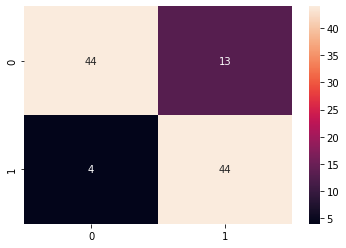

In [28]:
#Confusion Matrix
y_pred_rfc = gs_rfc.predict(X_test_2)
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm_rfc, annot=True, fmt="d")


In [29]:
y_pred_rfc = gs_rfc.predict(X_test_2)
print(classification_report(y_test, y_pred_rfc))
RF_grid_acc = accuracy_score(y_test, y_pred_rfc)

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        57
           1       0.77      0.92      0.84        48

    accuracy                           0.84       105
   macro avg       0.84      0.84      0.84       105
weighted avg       0.85      0.84      0.84       105



With GridSearchCV clearly there is some improvement in the performance of the Random Forest Classifier. Tried employing a boosting algorithm.

## GRADIANT BOOSTING CLASSIFIER

Training Score: 0.9057377049180327
Testing Score: 0.8
GB Accuracy: 0.8


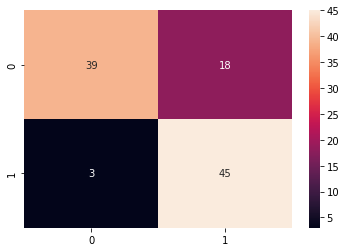

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42,loss='exponential',subsample=0.8,validation_fraction=0.2,n_iter_no_change=5, tol=0.01)      
gbc_fit = gbc.fit(X_transformed_new, y_train)

y_pred_gbc = gbc_fit.predict(X_test_2)
cm_gbc = confusion_matrix(y_test, y_pred_gbc)
sns.heatmap(cm_gbc, annot=True, fmt="d")
print("Training Score:", gbc.score(X_transformed_new, y_train))
print("Testing Score:", gbc.score(X_test_2, y_test))
print("GB Accuracy:",accuracy_score(y_test, y_pred_gbc))
GB_acc = accuracy_score(y_test, y_pred_gbc)

Training the Gradiant Bossting model using RandomSearchCV for hyperparameter tuning

In [31]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
                'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                'min_samples_leaf': [1, 2, 3, 4, 5],
                'max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
                'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900],
                'subsample': [0.3,0.5,0.7,0.8,0.9,1]
                }

gbc = GradientBoostingClassifier(random_state=2,loss='log_loss',subsample=0.5,validation_fraction=0.2,n_iter_no_change=5, tol=0.01,ccp_alpha=0.00001)       

rscv = RandomizedSearchCV(estimator=gbc, param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

rscv.fit(X_transformed_new, y_train)

results = rscv.cv_results_
print(f'The best parameter is : {rscv.best_params_}')
print(f'The best score is {rscv.best_score_}')
print(f'The best estimator is {rscv.best_estimator_}')

print("Training Score:", rscv.score(X_transformed_new, y_train))
print("Testing Score:", rscv.score(X_test_2, y_test))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


The best parameter is : {'subsample': 0.5, 'n_estimators': 800, 'min_samples_leaf': 2, 'max_features': 0.8, 'max_depth': 9, 'learning_rate': 0.01}
The best score is 0.8894557823129252
The best estimator is GradientBoostingClassifier(ccp_alpha=1e-05, learning_rate=0.01, max_depth=9,
                           max_features=0.8, min_samples_leaf=2,
                           n_estimators=800, n_iter_no_change=5, random_state=2,
                           subsample=0.5, tol=0.01, validation_fraction=0.2)
Training Score: 0.9672131147540983
Testing Score: 0.819047619047619


In [32]:
y_pred_rscv = rscv.predict(X_test_2)
print(classification_report(y_test, y_pred_rscv))


              precision    recall  f1-score   support

           0       0.90      0.75      0.82        57
           1       0.75      0.90      0.82        48

    accuracy                           0.82       105
   macro avg       0.83      0.83      0.82       105
weighted avg       0.83      0.82      0.82       105



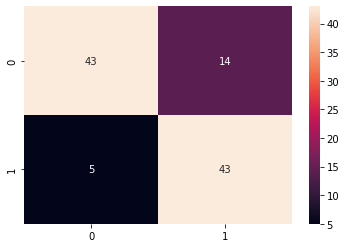

In [33]:
cm_rscv = confusion_matrix(y_test, y_pred_rscv)
sns.heatmap(cm_rscv, annot=True, fmt="d")
GB_rscv_acc = accuracy_score(y_test, y_pred_rscv)

In [34]:
%pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [35]:

import xgboost
classifier = xgboost.XGBClassifier()

params = {
 'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}
rs_model=GridSearchCV(classifier,params,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
rs_model.fit(X_transformed_new, y_train)

results = rs_model.cv_results_
print(f'The best parameter is : {rs_model.best_params_}')
print(f'The best score is {rs_model.best_score_}')
print(f'The best estimator is {rs_model.best_estimator_}')

print("Training Score:", rs_model.score(X_transformed_new, y_train))
print("Testing Score:", rs_model.score(X_test_2, y_test))

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits
The best parameter is : {'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 7}
The best score is 0.9310428701733049
The best estimator is XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Train

In [36]:
yhat_xg = rs_model.predict(X_test_2)
print("XGBoost Accuracy: ", accuracy_score(y_test, yhat_xg))
XGB_grid_acc = accuracy_score(y_test, yhat_xg)

XGBoost Accuracy:  0.7904761904761904


<AxesSubplot:>

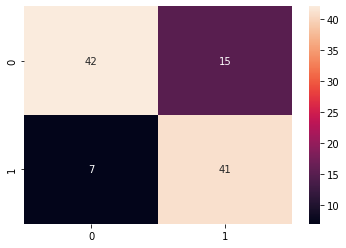

In [37]:
cm_rs = confusion_matrix(y_test,yhat_xg)
sns.heatmap(cm_rs, annot=True, fmt="d")

## Comparison of models

In [38]:
#  Create a dataframe to store the accuracy of models for further analysis
Model_df = pd.DataFrame(columns=['Model', 'Accuracy'])
Model_df['Model'] = ['Logistic Regression', 'SVM', 'Random Forest', 'Random Forest GridSearch', 'Gradient Boosting', 'Gradient Boosting RandomizedSearch', 'XGBoost GridSearch']
Model_df['Accuracy'] = [LR_acc, SVC_acc, RF_acc, RF_grid_acc, GB_acc, GB_rscv_acc, XGB_grid_acc]

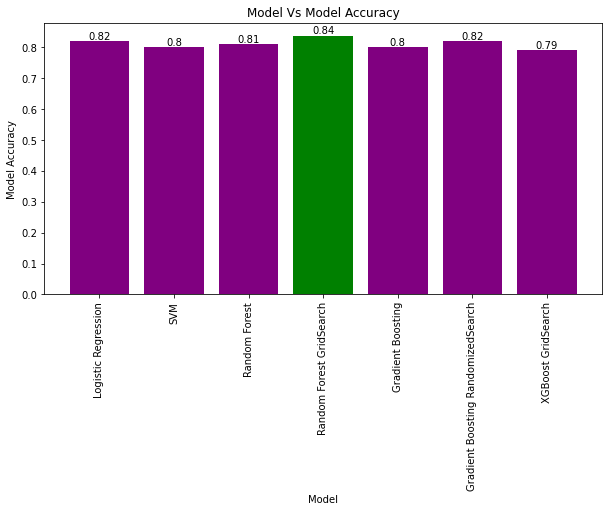

In [39]:
#plotting Model Vs Model Accuracy
fig , ax = plt.subplots(figsize=(10,5))
colors = ['purple'] * len(Model_df['Accuracy'])
highest_index = (Model_df['Accuracy']).idxmax()
colors[highest_index] = 'green'

plt.bar(x=Model_df['Model'], height=Model_df['Accuracy'], color=colors )

plt.title('Model Vs Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Model Accuracy')
plt.xticks(rotation=90)
for i, value in enumerate(np.around(Model_df['Accuracy'],2)):
    ax.text(i, value, str(value), ha='center', va='bottom')
plt.show()



## Conclusion

The bar graph shows that the Random Forest Classifier with GridSearchCV has performed well(84% accuracy) compared to the other models. The major evaluation metric used for comparison was accuracy, which is the proportion of correctly classified instances.